In [10]:
# Importing Libraries

import os
import numpy as np
from PIL import Image
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [16]:
def load_and_preprocess_images(image_dir, target_size):
    images = []
    labels = []
    class_names = []
    
    # Iterate through the subdirectories to get class names and corresponding label indices
    for i, class_name in enumerate(os.listdir(image_dir)):
        class_dir = os.path.join(image_dir, class_name)
        if os.path.isdir(class_dir):
            class_names.append(class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                
                # Load image using PIL and resize it
                img = Image.open(image_path).resize(target_size)
                
                # Convert PIL image to numpy array
                img_array = np.array(img)
                
                # Append image and label to the lists
                images.append(img_array)
                labels.append(class_name)  # Use the folder name as the label for each class
    
    return np.array(images), np.array(labels), class_names


In [32]:
def display_images(images, labels, class_names, cols=5):
    num_images = len(images)
    rows = (num_images + cols - 1) // cols
    rows = max(rows, 1)  # Ensure rows is at least 1

    if num_images == 0:
        print("No images to display.")
        return

    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

    for i in range(num_images):
        ax = axes[i // cols, i % cols]
        ax.imshow(images[i])
        ax.set_title(class_names[labels[i]])  # Use the label index to get the class name
        ax.axis("off")

    for i in range(num_images, rows * cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [17]:

image_dir = "clothing-dataset-small-master/Dataset/train"  # Replace this with the path to your labeled image directory
target_size = (128, 128)  # Adjust the size according to your model's input requirements
num_classes = len(os.listdir(image_dir))

# Step 1: Load and preprocess images
images, labels, class_names = load_and_preprocess_images(image_dir, target_size)


In [55]:
def display_image_with_label(image, label, class_names):
    plt.imshow(image)
    plt.text(5, 5, "Label: " + class_names[label], color='white', backgroundcolor='black', fontsize=10)
    plt.axis("off")
    plt.show()

In [20]:
labels

array(['dress', 'dress', 'dress', ..., 't-shirt', 't-shirt', 't-shirt'],
      dtype='<U10')

TypeError: list indices must be integers or slices, not numpy.str_

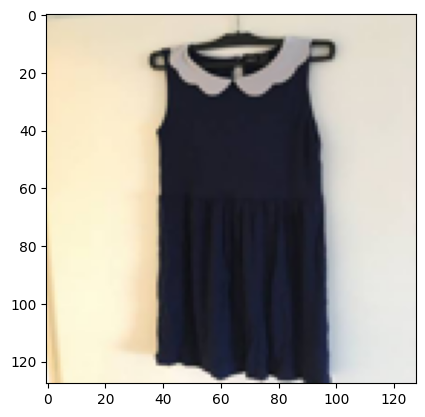

In [56]:
# Example: View the first image along with its label
index_to_display = 0
display_image_with_label(images[index_to_display], labels[index_to_display], class_names)


In [48]:
class_names

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [59]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [66]:
import pathlib
image_dir = "clothing-dataset-small-master/Dataset/train"
data_dir = pathlib.Path(image_dir).with_suffix('')

In [58]:
print(tf.__version__)

2.12.0


In [67]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3068


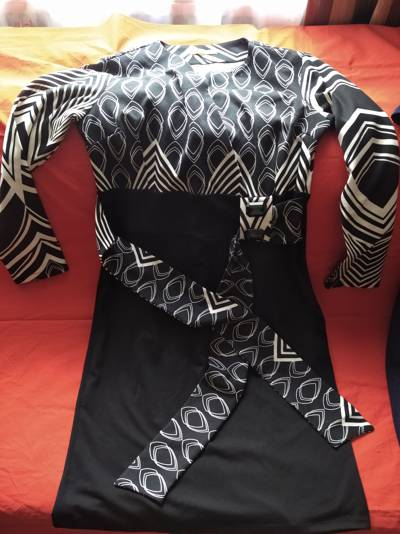

In [71]:
dress = list(data_dir.glob('dress/*'))
PIL.Image.open(str(dress[2]))

In [72]:
data_dir

WindowsPath('clothing-dataset-small-master/Dataset/train')

In [73]:
batch_size = 32
img_height = 180
img_width = 180

In [74]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3068 files belonging to 10 classes.
Using 2455 files for training.


In [75]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3068 files belonging to 10 classes.
Using 613 files for validation.


In [76]:
class_names = train_ds.class_names
print(class_names)

['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']


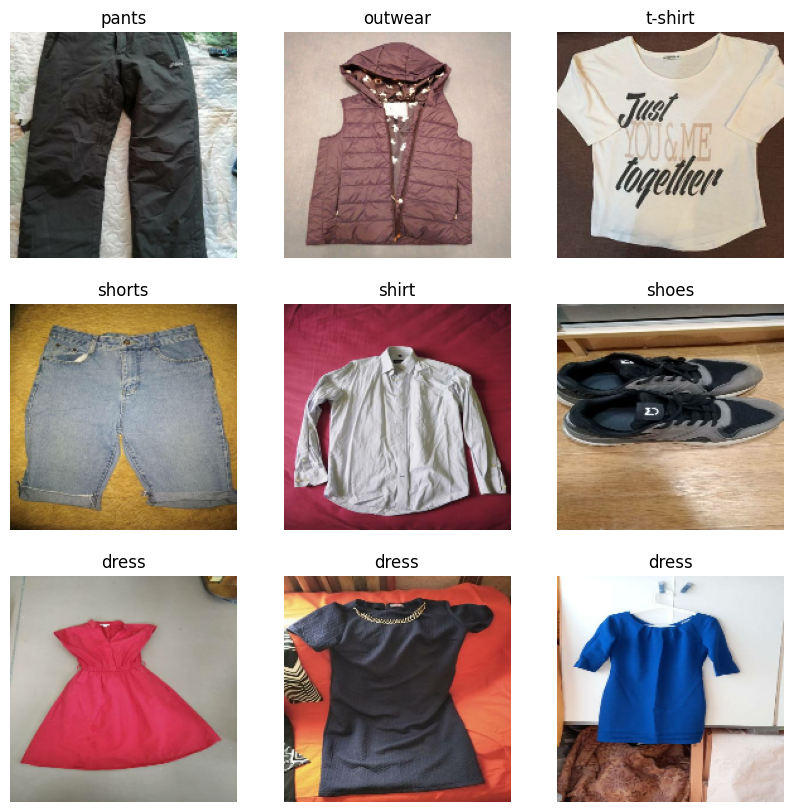

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [78]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [79]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [80]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0044280756 0.99710363


In [81]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [82]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

NEW CODE

In [49]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [50]:
os.listdir("./clothing-dataset-small-master/Dataset/train")

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [51]:
training_dataset_path = "./clothing-dataset-small-master/Dataset/train"
test_dataset_path = "./clothing-dataset-small-master/Dataset/test"

In [52]:
training_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

In [53]:
train_dataset = torchvision.datasets.ImageFolder(root = training_dataset_path, transform = training_transforms)

In [54]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 32, shuffle = False)

In [55]:
def get_mean_and_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images,_ in loader:
        image_count_in_a_batch = images.size(0)
        images = images.view(image_count_in_a_batch, images.size(1), -1)
        mean +=images.mean(2).sum(0)
        std +=images.std(2).sum(0)
        total_images_count += image_count_in_a_batch
        
        
    mean /= total_images_count
    std /= total_images_count
    
    return mean, std

In [56]:
mean, std = get_mean_and_std(train_loader)

In [57]:
print(mean, std)

tensor([0.5536, 0.4736, 0.4544]) tensor([0.2153, 0.2127, 0.1970])


In [58]:
train_transforms = transforms.Compose([
     transforms.Resize((224, 224)),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(10),
     transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
    
])

In [59]:
    train_dataset = torchvision.datasets.ImageFolder(root = training_dataset_path, transform = train_transforms)
    test_dataset = torchvision.datasets.ImageFolder(root = test_dataset_path, transform = test_transforms)

In [60]:
def show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size=6, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    
    grid = torchvision.utils.make_grid(images, nrow=3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels', labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels tensor([9, 1, 9, 4, 2, 5])


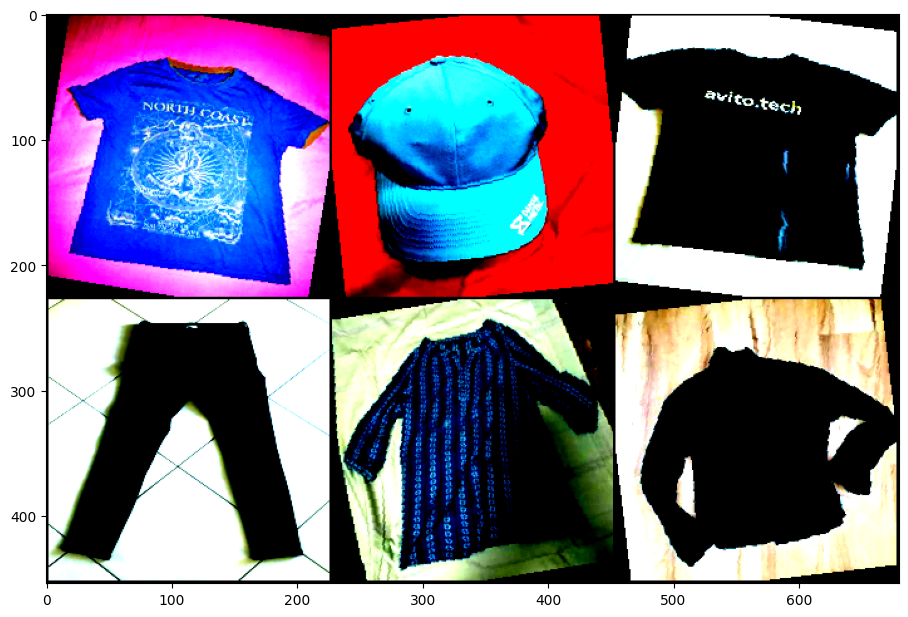

In [61]:
show_transformed_images(train_dataset)

In [62]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [63]:
def set_device():
    if torch.cuda.is_available():
        dev="cuda:0"
    else:
        dev="cpu"
    return torch.device(dev)

In [68]:
def train_nn(model, train_loader, test_loader, criterion, optimizer, n_epochs):
    device = set_device()
    
    for epoch in range(n_epochs):
        print("Epoch number %d" % (epoch+1))
        model.train()
        running_loss = 0.0
        running_correct = 0.0
        total = 0
        
        for data in train_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            total += labels.size(0)
            
            optimizer.zero_grad()
            
            outputs = model(images)
            
            _, predicted = torch.max(outputs.data, 1)
            
            loss = criterion(outputs, labels)
            
            loss.backward()
            
            optimizer.step()
            
            running_loss += loss.item()
            running_correct += (labels == predicted).sum().item()
            
        epoch_loss = running_loss/len(train_loader)
        epoch_acc = 100.00 * running_correct/total
        
        print(" - Training dataset. Got %d out of %d images correctly (%.3f%%). Epoch loss: %.3f"
              %(running_correct, total, epoch_acc, epoch_loss))
        evaluate_model_on_test_set (model, test_loader)
        
    print("Finished")
    return model

In [70]:
def evaluate_model_on_test_set(model, test_loader):
    model.eval()
    predicted_correctly_on_epoch = 0
    total = 0
    device=set_device()
    with torch.no_grad ():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            total += labels.size(0)
            outputs = model (images)
            _, predicted = torch.max(outputs.data, 1)

            
            predicted_correctly_on_epoch+=(predicted==labels).sum().item()
            
        epoch_loss = predicted_correctly_on_epoch/len(test_loader)
        epoch_acc = 100.00 * predicted_correctly_on_epoch/total
        
        print(" - Testing dataset. Got %d out of %d images correctly (%.3f%%). Epoch loss: %.3f"
              %(predicted_correctly_on_epoch, total, epoch_acc, epoch_loss))
        evaluate_model_on_test_set (model, test_loader)

In [66]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

resnet18_model = models.resnet18(pretrained=False)
num_ftrs=resnet18_model.fc.in_features
number_of_classes = 10
resnet18_model.fc = nn.Linear(num_ftrs, number_of_classes)
device = set_device()
resnet_18_model = resnet18_model.to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.003)

In [71]:
train_nn(resnet18_model, train_loader, test_loader, loss_fn, optimizer, 150)

Epoch number 1
 - Training dataset. Got 1154 out of 3068 images correctly (37.614%). Epoch loss: 1.856
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 372 images correctly (37.366%). Epoch loss: 11.583
 - Testing dataset. Got 139 out of 37

KeyboardInterrupt: 